In [97]:
#libraries

import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time
import datetime as dt

In [98]:

#assign start and end dates
start_date=datetime(2016,1,1)
end_date=datetime(2021,11,22)
#populate the dataframe with data from the Yahoo Website
df = web.DataReader('AAPL', 'yahoo', start=start_date, end=end_date)
df = df[start_date:end_date]


In [99]:
df = df["Close"]


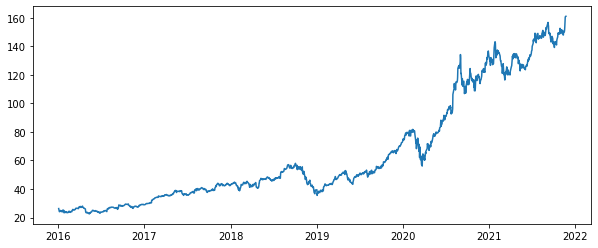

In [100]:
#Plot of data
plt.figure(figsize=(10,4))
plt.plot(df)


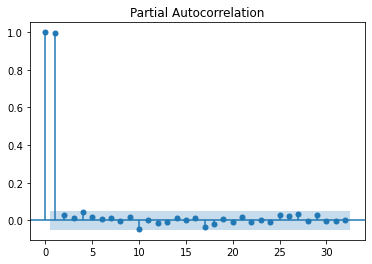

In [101]:
#PACF
pacf= plot_pacf(df)

In [102]:
#slpitting data for training and testing
train_end = datetime(2018,12,1)
test_end = datetime(2021,11,22)
train_data = df[:train_end]
test_data = df[train_end + timedelta(days=1):test_end]

In [103]:
#define model
model = ARMA(train_data, order=(1,0))

/Users/ln/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/ln/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no as

In [104]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.09286618232727051


In [105]:
#summary of the model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  735
Model:                     ARMA(1, 0)   Log Likelihood                -627.378
Method:                       css-mle   S.D. of innovations              0.566
Date:                Mon, 22 Nov 2021   AIC                           1260.755
Time:                        14:27:16   BIC                           1274.555
Sample:                             0   HQIC                          1266.078
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          36.0545      7.284      4.950      0.000      21.778      50.331
ar.L1.Close     0.9982      0.002    598.894      0.000       0.995       1.001
                                    Roots       

In [106]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [107]:
pred_start_date

Timestamp('2018-12-03 00:00:00')

In [108]:
#Prediction data
predictions = model_fit.predict(start = pred_start_date, end = pred_end_date)
residuals = test_data - predictions


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
#plot of residual
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
